# Gradient Descent Implementation 

### Function defined :   Error compute for a given slope , intercept pair  and points set

In [1]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept

def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2

    return totalError / float(len(points))

### Function defined :  Step Gradient 

In [2]:
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
        
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

### Function  defined : Gradient descent runner 

In [3]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

### Main code

In [5]:
#------------------------------------------------------------------
# read data 
#------------------------------------------------------------------

# Get raw data points 
points = genfromtxt("data.csv", delimiter=",")

# remove nans 
points = array(points[~isnan(points).any(axis=1)])

In [7]:
#-------------------------------------------------------------------
# set constants 
#-------------------------------------------------------------------

# set learning rate 
learning_rate = 0.0001

# set initial guess 
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess

# set iter limit 
num_iterations = 1000


# get optimal gradient and slope 
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
print("Running...")
[b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))


Starting gradient descent at b = 0, m = 0, error = 5611.166153829124
Running...
After 1000 iterations b = 0.10148121497503654, m = 1.4796491688881985, error = 111.01093660868817


### Plots 

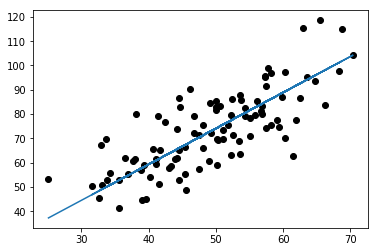

In [9]:
import numpy as np
import matplotlib.pyplot as plt

X = points[:,0]
Y = points[:,1]

# Equation of fitted line 
Y2 = m*X + b
plt.scatter(X,Y,color='k')
plt.plot(X, Y2)
plt.show()